In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import yaml
import urllib.request
import matplotlib.font_manager
flist = matplotlib.font_manager.get_font_names()
from tempfile import NamedTemporaryFile
import urllib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import matplotlib.patches as patches
from extremeweatherbench import evaluate, events, config
sns.set_theme(style='whitegrid')

In [2]:
model = 'FOUR_v200_GFS'
event_list = [events.HeatWave,
              events.Freeze,
              events.Severe]
configuration = config.Config(
    event_types=event_list,
    )
default_forecast_config = config.ForecastSchemaConfig()
cases = evaluate.get_case_metadata(eval_config=configuration)

In [3]:
github_url = 'https://github.com/google/fonts/blob/1082e5cba575b5e0aa2ab8addff278695f3e0905/ofl/dmsans/DMSans%5Bopsz%2Cwght%5D.ttf'


url = github_url + '?raw=true'  # You want the actual file, not some html

response = urllib.request.urlopen(url)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()

prop = fm.FontProperties(fname=f.name)

# .fontManager.addfont()
# names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
# print(names)

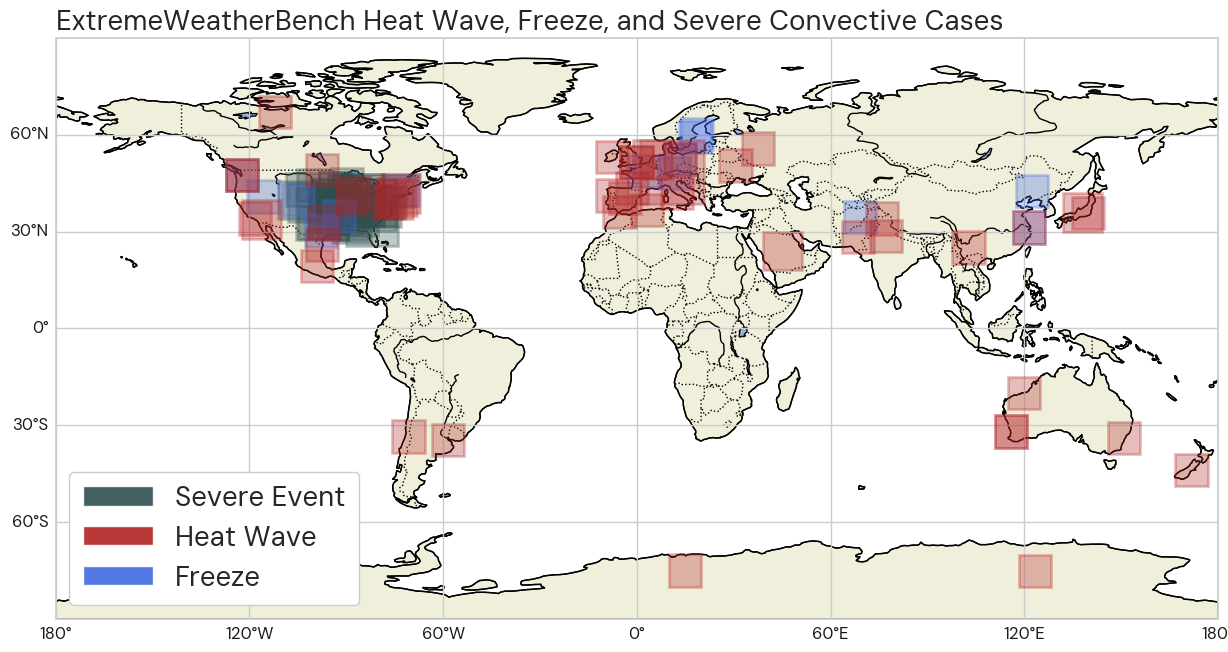

In [19]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and gridlines
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS, edgecolor='black')

# Add gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()
gl.xlabel_style = {'size': 12, 'color': 'k', 'fontproperties': prop}
gl.ylabel_style = {'size': 12, 'color': 'k', 'fontproperties': prop}

# Define colors for each event type
event_colors = {
    'severe_day': 'darkslategray',
    'heat_wave': 'firebrick',
    'freeze': 'royalblue',
    
}

# Plot boxes for each case
for event in cases[::-1]:
    for indiv_case in event.cases:
        lat = indiv_case.location.latitude
        lon = indiv_case.location.longitude
        half_box = indiv_case.bounding_box_degrees
        
        # Get color based on event type
        event_type = indiv_case.event_type
        color = event_colors.get(event_type, 'gray')  # Default to gray if event type not found

        # Create a rectangle around the indiv_case location
        rect = patches.Rectangle((lon - half_box, lat - half_box), 2 * half_box, 2 * half_box,
                                linewidth=2, edgecolor=color, facecolor=color, transform=ccrs.PlateCarree(), zorder=10, alpha=0.3)
        ax.add_artist(rect)
        
        # Plot the id number next to each rectangle
        # Use white text for both event types for better visibility
        # ax.text(lon, lat, str(indiv_case.id), transform=ccrs.PlateCarree(), fontsize=16, ha='center', va='center', 
        #         color='white', fontproperties=prop, bbox=dict(facecolor=color, alpha=0, edgecolor=None), 
        #         zorder=10, fontweight='bold')

# Create a custom legend for event types
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=event_colors['severe_day'], alpha=0.9, label='Severe Event'),
    Patch(facecolor=event_colors['heat_wave'], alpha=0.9, label='Heat Wave'),
    Patch(facecolor=event_colors['freeze'], alpha=0.9, label='Freeze'),
    
]
# Create a larger legend by specifying a larger font size in the prop dictionary
legend_prop = prop.copy()
legend_prop.set_size(20)  # Increase font size for legend
ax.legend(handles=legend_elements, loc='lower left', prop=legend_prop, framealpha=1, 
          frameon=True, borderpad=0.5, handletextpad=0.8, handlelength=2.5)

ax.set_title('ExtremeWeatherBench Heat Wave, Freeze, and Severe Convective Cases', loc='left', fontproperties=prop, fontsize=20)
plt.savefig('extreme_weather_cases.png', transparent=True)